In [1]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [55]:
# pip install causalgraphicalmodels
# pip install linearmodels

from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

# Reporte 8

Claudia Katherine Milla Rojas

## Lectura

El presente artículo de Melissa Dell estudia los impactos a largo plazo de la mita minera, un sistema de trabajo obligatorio llevado a cabo en 1573 por los españoles en el Perú. De esta forma, el texto responde a la siguiente pregunta de investigación: ¿Cuáles son los impactos que la mita minera pudo tener a largo plazo en el desarrollo económico peruano y cómo ello afectó a los actuales niveles de vida? 

Es así como a lo largo del texto se identifican múltiples fortalezas. En primer lugar, la delimitación espacial de la investigación. En este sentido, observamos que se concentra específicamente en la zona que atraviesa la cordillera de los Andes al sur del Perú. Con ello, la autora identifica que la asignación a la mita es diferente por cada distrito y emplea dos criterios para ello: la altitud y la distancia a las minas de Potosí. Con ello, a modo de contribución, observa que los distritos que no tuvieron mita fueron los más alejados de los centros mineros. La hipótesis planteada es que la creación de un sistema estable de tenencia de la tierra, que a su vez fomentó la provisión de bienes públicos, fue posible por la presencia a largo plazo de grandes terratenientes en los distritos que no tuvieron mita. Asimismo, para determinar los controles de las características geográficas exógenas la autora obtuvo la pendiente ponderada media y la altitud ponderada media de la zona de cada distrito. 

En segundo lugar, otra fortaleza es que la autora le da importancia a otros factores que podrían haber afectado en la asignación a la mita. Por ende, menciona que la regresión discontinua que se empleó requirió de dos supuestos, y para evaluar su plausibilidad se analizaron características como la altitud, la fertilidad del suelo, la etnicidad entre otros factores.

En tercer lugar, resulta de gran utilidad la inclusión de una aproximación de regresión discontinua (RD), lo cual es un método cuasi-experimental que permite evaluar efectos causales, en este caso el impacto de la mita. Así, menciona que el límite de la mita genera una discontinuidad multidimensional, lo cual no es usualmente analizado en la regresión discontinua. Por ende, es interesante la forma en que se debe analizar y especificar el polinomio RD. Asimismo, al momento de su análisis la autora presenta otras fortalezas como el uso de fórmulas matemáticas y la explicación de las mismas, así como de las variables presentadas. En efecto, deja en claro a qué se refiere cada variable (si es una variable de interés, un vector, una variable demográfica, etc) y la relación entre ellas, lo cual hace el texto entendible para el lector. Cabe destacar que también se emplean diversos gráficos y cuadros que evidencian los datos a trabajar y, en algunos casos, los resultados. Un ejemplo de ello son los gráficos del punto 2, los cuales muestran los resultados obtenidos de la longitud y latitud, cada uno con sus respectivas leyendas y medidas.

De igual forma, otra fortaleza sería la revisión histórica que realiza, pues supone una base de datos específicos y, por ende, una bibliografía exhaustiva de documentos históricos. En este caso, se utilizan datos sobre la mita minera, el imperio español y el Perú, lo cual incluso contribuye a las investigaciones sobre nuestro país. En base a ello, una de sus conclusiones es que la forma en la que se utiliza al Estado para dar forma a las interacciones a nivel económico puede ser un punto de partida para modelar el crecimiento a largo plazo de América Latina. Esto debido a que se observó un vínculo positivo entre el desarrollo económico actual y las haciendas históricas. De hecho, esto incluso es una contribución a la academia, puesto a que refuta la hipótesis tradicional que menciona que no se ha podido dar un crecimiento de latinoamérica debido a la desigualdad histórica en el acceso a la tierra. Con respecto a los datos utilizados, estos fueron recogidos de distintos censos nacionales, así como de investigaciones y proyectos (SRTM, Enaho, INEI, MINEDU, etc).  

Por otro lado, es posible identificar otras contribuciones del artículo en base a sus hallazgos. En este sentido, la autora no solo realiza una revisión histórica, sino que utiliza estos datos junto con la aproximación RD para investigar los canales de la mita que persisten y afectan al desarrollo económico actual. De esta forma, se identificaron tres canales principales. Primero, se observó que las haciendas, en su mayoría, tuvieron un desarrollo geográficamente alejado de la mita. Segundo, se encontró que los distritos que estuvieron sujetos a la mita en la actualidad tienen un nivel menor de educación y aún no se les incluye del todo en la red de carreteras. Tercero, se determinó que el aumento de la persistencia de la agricultura de subsistencia es uno de los efectos a largo plazo de la mita. En otras palabras, se pudo observar que utilizó la variación exógena en la asignación de la mita para reconocer los canales mediante los que influye en el desarrollo económico contemporáneo y, así, responder a la pregunta de investigación.

Asimismo, el artículo ofrece evidencia microeconómica al fijar un vínculo entre los resultados económicos actuales y las instituciones históricas a partir del uso de datos agregados. A su vez, estos datos refuerzan la hipótesis de que las instituciones extractivas históricas tienen impacto en el crecimiento económico a largo plazo. La aproximación de regresión discontinua junto a los datos de encuestas de hogares concluyeron que un efecto de largo plazo de la mita reduce actualmente el consumo doméstico en aproximadamente 25% en los distritos que estuvieron sujetos a la mita. Por ejemplo, en base al microcenso del MINEDU respecto al tamaño de los escolares, Dell menciona que la mita eleva el retraso en el crecimiento infantil en aproximadamente 6 puntos porcentuales. Esto debido a que consideró “con retraso de crecimiento” a aquellos niños que midan más de dos desviaciones estándar menos que la mediana apta para su edad (en base a los datos de referencia de la OMS). Sin embargo, se observa que este censo sólo analiza a los niños matriculados en los colegios con respecto a las tallas, por lo que considero aquello como una debilidad del texto. Al crear un vínculo entre el retraso del crecimiento y la desnutrición se está dejando de lado a los niños más pobres, quienes no tienen el dinero suficiente para inscribirse en una institución educativa y, por ende, tendrían incluso menos ingresos para una canasta básica de alimentos.

Finalmente, otros estudios en la misma línea de investigación podrían basarse en el desarrollo de modelos generales de evolución institucional y la manera en que estas restricciones se ven influenciadas por las fuerzas que promueven el cambio. No obstante, también podrían investigarse acontecimientos del pasado que puedan haber tenido un impacto en la vida actual de las personas. Un claro ejemplo de ello es el estudio de Paola Sulca (2019), quien en su estudio titulado “¿Pueden los shocks idiosincráticos explicar la demanda por seguros en el Perú?” se encargó de identificar si la experiencia previa de los shocks idiosincráticos pasados impactó de alguna forma en la tenencia de seguros en el caso peruano. Así, halló conclusiones tales como que la clase de seguro afectado dependía del shock que se había experimentado.


## Código

### Variables Instrumentales

1. Para esta primera sección deben darle una leida a The Effect Book principalmente al capitulo de Instrumental Variables.

- Explique en qué consiste el supuesto de "Relevance"
- Explique en qué consiste el supuesto de "Validity"

Ambos supuestos son necesarios para que las variables instrumentales funcionen. Por un lado, el supuesto de relevancia del instrumento consiste en que la variable $X$ debe tener una relación con el instrumento $Z$, ya que de no ser así las variables instrumentales no funcionan puesto a que en las variables instrumentales se usa la parte $X$ (el tratamiento) que es explicada por $Z$ (el instrumento). De esta forma, se entiende que habrá más confianza en la suposición de relevancia mientras más fuerte sea la relación entre $X$ y $Z$, pero también saltará menos la estimación de una muestra a otra. 

Por otro lado, el supuesto de la validez del instrumento consiste en la suposición de que el instrumento $Z$ es una variable que no tiene puertas abiertas propias, ya que si cualquier procedimiento que se realice entre el instrumento $Z$ y el resultado $Y$ debe pasar por el tratamiento $X$. Por ende, se le considera como el supuesto más tenso de los dos. De manera intuitiva, se podría entender de la siguiente manera:
$$ Z → X → Y$$
$$ Z → X ← A → Y $$
$$ Z ← C → X ← D → Y $$





### Ploteo de Histogramas

2. Tomando en cuenta que la variable nearc4 representa si existe un college en el county debe realizar los siguientes ploteos de histogramas.

- Grafique dos histogramas para la variable años de educación educ para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.


In [68]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

data = read_data("card.dta")
data.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


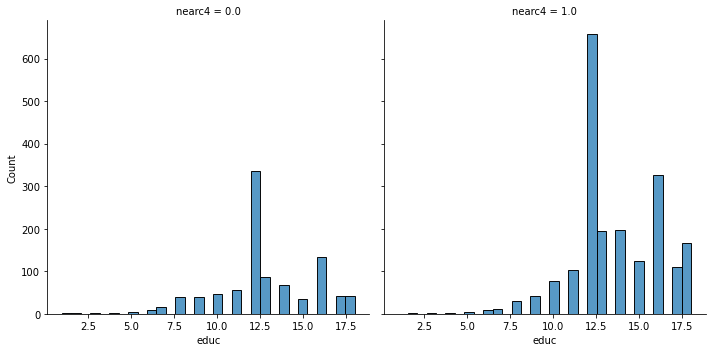

In [83]:
sns.displot(data, x = "educ", col = "nearc4")

Interpretación: Se puede observar que los valores que toma la variable de educación van de 2.5 a 17.5. Asimismo, teniendo en cuenta que la variable nearc4 se refiere a qué tan próximo los hombres vive de la universidad, el valor de 0 representa a quienes viven lejos y el 1 a quienes viven cerca. Por ende, se entiende que las personas que viven lejos han tenido un menor nivel de educación en comparación a quienes viven más cercanos a universidades.

- Grafique dos histogramas para la variable años del logaritmos de los ingresos lwage para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

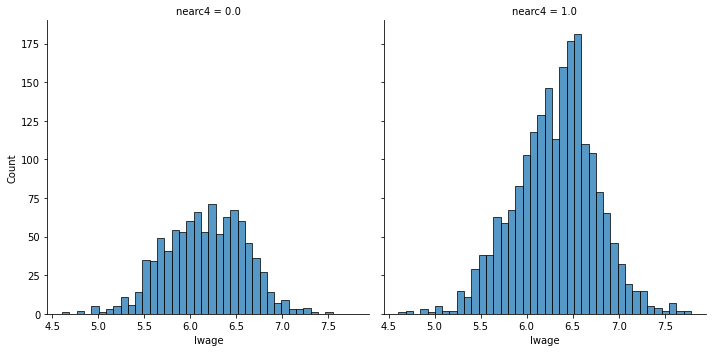

In [84]:
sns.displot(data, x = "lwage", col = "nearc4")

Interpretación: Se puede observar que los valores que toma el logaritmo del salario van de 4.5 a 7.5. Por ende, basándonos en la misma lógica anteriormente descrita, se entiende que las personas que viven más lejos de las universidades (cuando nearc4 es 0) tienen ingresos menores en comparación a quienes viven más cerca (cuando nearc4 es 1).


### Regresiones

3. Ahora van a replicar las regresiones que hicimos en clase pero el instrumento Z ya no será nearc4 sino nearc2 .

- Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [86]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = data).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        15:46:44   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretación: Se puede observar que, en términos de correlación, todas las variables son estadísticamente significativas, ya que el p-value es menor a 0.05. Asimismo, con respecto a el coeficiente relacionado a educación se obtiene que un año extra de educación me origina 0.07 veces unidades logaritmicas de salario. 

- Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2 . La regressión debería tener una forma de este tipo "lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4 ]". Compare los resultados encontrados en la regresión de arriba. Cambió el coeficiente relacionado a educ , ¿por qué?

In [88]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", data).fit()
iv_reg.summary

D:\Anaconda\lib\site-packages\linearmodels\iv\model.py:543: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.2536
Estimator:                    IV-2SLS   Adj. R-squared:                -1.2581
No. Observations:                3003   F-statistic:                    296.29
Date:                Wed, Nov 09 2022   P-value (F-stat)                0.0000
Time:                        15:47:55   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.2107     3.1235     0.0675     0.9462     -5.9112      6.3327
black          0.1051     0.1786     0.5888     0.5560     -0.2449      0.4552
exper          0.1496     0.0744     2.0111     0.0443      0.0038      0.2954
married       -0.0149     0.0149    -0.9965     0.3190     -0.0442      0.0144
smsa           0.0245     0.1018     0.2410     0.8095     -0.1749      0.2240
south         -0.0325     0.0689    -0.4719     0.6370     -0.1675      0.1025
educ           0.3566     0.1837     1.9410     0.0523     -0.0035      0.7167
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

Interpretación: 

En la regresión de tipo OLS, se pudo observar al coeficiente relacionado a educ con un valor de 0.0712, mientras que en la regresión de tipo 2SLS se pudo obtener el mismo coeficiente con un valor de 0.3566. Es decir, se puede evidenciar un aumento del coeficiente con la regresión de tipo de 2SLS. Asimismo, a diferencia del primer caso (OLS), en el segundo (2SLS) se observa que no es estadisticamente significativo, pues el p-value es mayor a 0.05. En efecto, tiene un valor de 0.0523. 

En conclusión, utilizando el instrumento hemos encontrado que el efecto que tiene la educación sobre los salarios es mucho más grande. Este se incrementó debido a que hemos instrumentalizado a la variable educación por la distancia a la que vivimos de la universidad. De esta forma, utilizando un instrumento podemos limpiar el problema de endogeneidad que se presenta en la variable "educación" y, a partir de ello, descubrir la relación causal que existe en la educación sobre el nivel de los salarios. En este caso, se ha demostrado que el coeficiente es alrededor de 400% más grande.

